In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
ls = []
import os
for dirname, _, filenames in os.walk('C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images'):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))
ls[0]
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\\predict\\4.jpg'

In [2]:
# Necessary Imports
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# Path to Kaggle Input
path = "C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images"
# Walk through the directory and list number of files
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images'.
There are 0 directories and 3 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\predict'.
There are 24 directories and 0 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\test'.
There are 0 directories and 31 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\test\Ajanta Caves'.
There are 0 directories and 36 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\test\alai_darwaza'.
There are 0 directories and 35 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\test\alai_minar'.
There are 0 directories and 30 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\test\basilica_of_bom_jesus'.
There are 0 directories and 34 images in 'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images\test\Charar-E- Sharif'.
There are 0 directories 

In [6]:
# append the training and the testing paths to the original path
train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'C:/Users/NIMIT/Desktop/cnnmodel/archive/Indian-monuments/images/train/'

In [7]:
# get all the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [8]:
# function used to view an random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    
  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Image shape: (403, 612, 3)


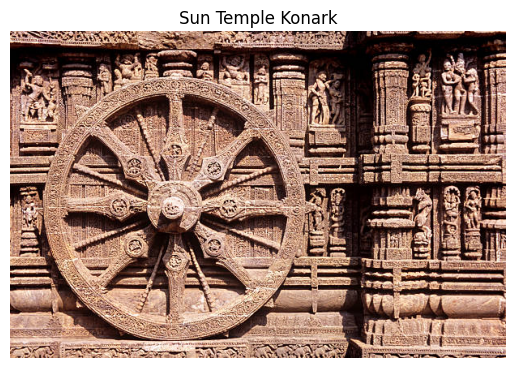

In [9]:
 #View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) # get a random class name

In [10]:

import tensorflow 

In [15]:
from tensorflow.keras.models import load_model
model_11 = load_model('C:/Users/NIMIT/Desktop/cnnmodel/archive/my_combined_model.h5')


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


plot_loss_curves(model_11)

In [17]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
    
  return img

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


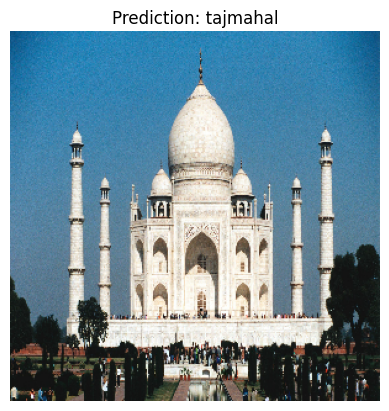

In [22]:
# make a new prediction
pred_and_plot(model_11, "Indian-monuments/images/predict/taj2.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


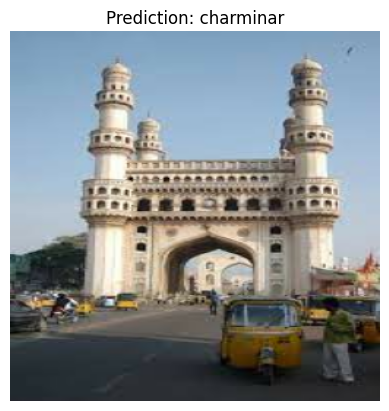

In [24]:
pred_and_plot(model_11, "Indian-monuments/images/predict/download.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


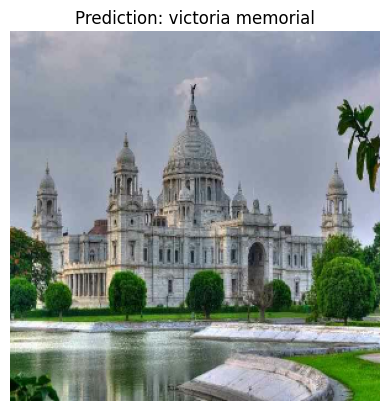

In [25]:
pred_and_plot(model_11, "Indian-monuments/images/predict/vict.jpeg", class_names)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


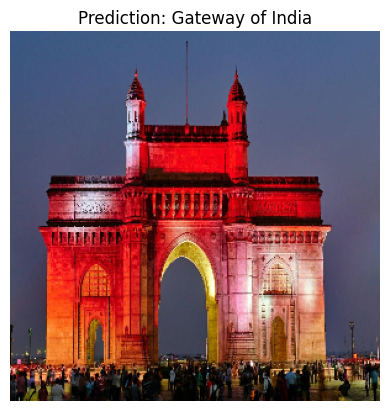

In [26]:
pred_and_plot(model_11, "Indian-monuments/images/predict/mumgate.jpg", class_names)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


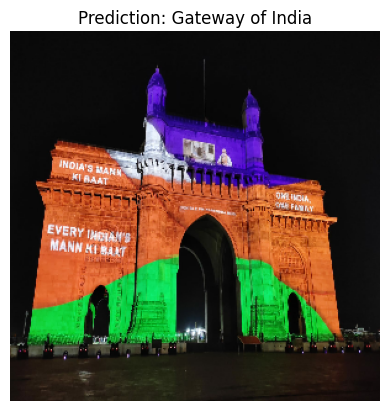

In [37]:
pred_and_plot(model_11, "Indian-monuments/images/predict/night.jpeg", class_names)    